In [1]:
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import random
import math
from nltk.tokenize import word_tokenize
from collections import Counter


f = open('../../data/tom_sawyer.txt')
l = f.readlines()

stopWords = ['.', ',', '!', '?', '-', ';', '_']
#stop words used for cleaning


def lineCorrector(l):
    p = l[:-2]
    if len(p) > 0:
        return p
lines_ = map(lineCorrector, l)
lines = []
for i in lines_:
    if i != None:
        lines.append(i)

lines = lines[252:]
#starting of the actual text of the story

data = ' '.join(lines).decode('utf-8')
textInWords = [i for i in word_tokenize(data.lower()) if i not in stopWords]
count = Counter(textInWords)
wordFrequencies = sorted(count.values(), reverse=True)


sortedTypes =  sorted(count.items(), key=lambda i: i[1], reverse=True)
tokens = word_tokenize(data.lower())
types = [ sortedTypes[j][0] for j in xrange(len(sortedTypes)) ]
Ranks = []

noOfTokens = float(len(tokens))
noOfTypes = float(len(types))
TTR = noOfTypes/noOfTokens

noOfTokens

for i in xrange(int(noOfTypes)):
    if i == 0:
        Ranks.append(i+1)
    else:
        if wordFrequencies[i-1] == wordFrequencies[i]:
            Ranks.append(Ranks[-1])
        else:
            Ranks.append(Ranks[-1]+1)


In [2]:
noOfTypes

8239.0

In [3]:
TTR

0.09150174363075009

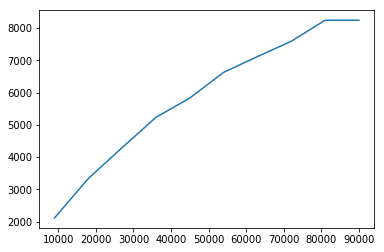

In [4]:
dataPoints_x = []
dataPoints_y = []
for i in xrange(10):
    splitList = textInWords[0: (i+1)*9000]
    uniqueWords = len(list(set(splitList)))
    dataPoints_x.append(uniqueWords)
    dataPoints_y.append((i+1)*9000)
    
for i in xrange(int(noOfTypes)):
    if i == 0:
        Ranks.append(i+1)
    else:
        if wordFrequencies[i-1] == wordFrequencies[i]:
            Ranks.append(Ranks[-1])
        else:
            Ranks.append(Ranks[-1]+1)

    
plt.plot(dataPoints_y, dataPoints_x)
plt.show()

#the following plot is for showing heapsLaw

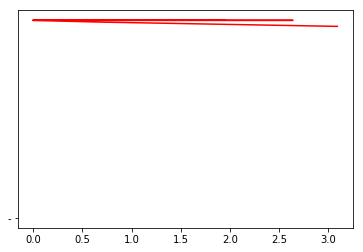

In [5]:
randints = sorted([random.randint(0, 8000) for i in xrange(10)])
testWords = [ textInWords[randints[i]] for i in xrange(10)]
wordRanks = [ Ranks[randints[i]] for i in xrange(10)]

noOfWordMeanings = [ len(wn.synsets(testWords[i])) for i in xrange(10)]
wordLength = [ len(testWords[i]) for i in xrange(10)]
wordFrequencies = [ wordFrequencies[randints[i]] for i in xrange(10)]

logOfWordRanks = []
logOfWordFrequencies = []
logOfWordLength = []
logWordMeanings = []

for i in xrange(10):
    if noOfWordMeanings[i] == 0:
        noOfWordMeanings[i] = 1
    logOfWordFrequencies.append(math.log(float(wordFrequencies[i])))
    logOfWordLength.append(math.log(float(wordLength[i])))
    logOfWordRanks.append(math.log(float(wordRanks[i])))
    logWordMeanings.append(math.log(float(noOfWordMeanings[i])))

plt.plot(logWordMeanings,logOfWordRanks, 'r', '-')
plt.show()

#this plot is log(m) VS log(r) which should be a straight line as the values are proportional to each other

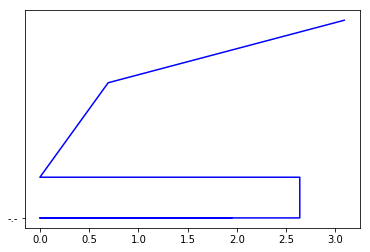

In [6]:
plt.plot(logWordMeanings, logOfWordFrequencies, 'b', '-.-')
plt.show()

#this plot is log(m) VS log(f) which should be a straight line as the values are proportional to each other

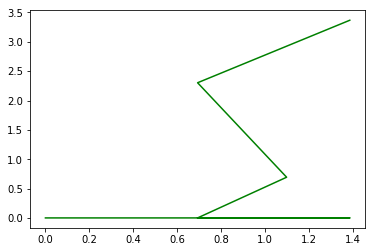

In [7]:
plt.plot(logOfWordLength, logOfWordFrequencies, 'g')
plt.show()

#this plot is log(l) VS 0.5log(f) which should be straight line as l is proportional to sqrt(f) with positive slope

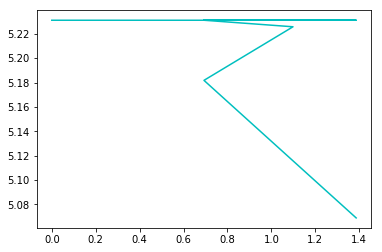

In [8]:
plt.plot(logOfWordLength, logOfWordRanks, 'c')
plt.show()

#this plot is log(l) VS 0.5log(r) which should be straight line as l is inversly proportional to sqrt(r) with negative slope

In [9]:
lVSf = [ wordFrequencies[i]*wordLength[i] for i in xrange(10)]
lVSr = [ wordRanks[i]/float(wordLength[i]) for i in xrange(10)]
mVSf = [ math.sqrt(wordFrequencies[i])/float(noOfWordMeanings[i]) for i in xrange(10)]
mVSr = [ math.sqrt(wordRanks[i])*float(noOfWordMeanings[i]) for i in xrange(10)]

lVSf

#the product of l and f should be constant for the proportionality 

[116, 20, 6, 6, 2, 3, 2, 4, 1, 1]

In [10]:
lVSr

#the division of l and r should be constant because of the proportionality

[39.75, 89.0, 62.0, 62.0, 93.5, 62.333333333333336, 93.5, 46.75, 187.0, 187.0]

In [11]:
mVSf

#the division of sqrt(f) and m must be constant because of the proportionality 

[0.2447802185061138,
 1.5811388300841898,
 1.4142135623730951,
 0.10101525445522108,
 0.07142857142857142,
 1.0,
 0.5,
 0.16666666666666666,
 0.14285714285714285,
 0.14285714285714285]

In [12]:
mVSr

#the product of sqrt(r) and m must be constant because of the proportionality

[277.4094446842068,
 26.68332812825267,
 13.638181696985855,
 190.93454375780198,
 191.44712063648282,
 13.674794331177344,
 27.349588662354687,
 82.04876598706406,
 95.72356031824141,
 95.72356031824141]